In [42]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pandas.read_csv('modelResults.csv')
df.head()

,Unnamed: 0,Validation_Set,topics,alpha,beta,coherence
0,0,75% Corpus,2,0.01,0.01,0.798245
1,1,75% Corpus,2,0.01,0.31,0.806073
2,2,75% Corpus,2,0.01,0.61,0.806416
3,3,75% Corpus,2,0.01,0.9099999999999999,0.806135
4,4,75% Corpus,2,0.01,symmetric,0.805331


In [44]:
# Filter only 75% corpus
df = df[df['Validation_Set'] == '75% Corpus']

In [45]:
df[(df['alpha'] == '0.01') & (df['beta'] == '0.01')]

,Unnamed: 0,Validation_Set,topics,alpha,beta,coherence
0,0,75% Corpus,2,0.01,0.01,0.798245
30,30,75% Corpus,3,0.01,0.01,0.792259
60,60,75% Corpus,4,0.01,0.01,0.784756
90,90,75% Corpus,5,0.01,0.01,0.756741
120,120,75% Corpus,6,0.01,0.01,0.740177
150,150,75% Corpus,7,0.01,0.01,0.739907
180,180,75% Corpus,8,0.01,0.01,0.694321
210,210,75% Corpus,9,0.01,0.01,0.708850
240,240,75% Corpus,10,0.01,0.01,0.694927


In [48]:
from collections import defaultdict

results = defaultdict(list)

In [49]:
for index, row in df.iterrows():
    key = f'{row["alpha"]}'
    results[key].append((row["beta"], row["topics"], row["coherence"]))


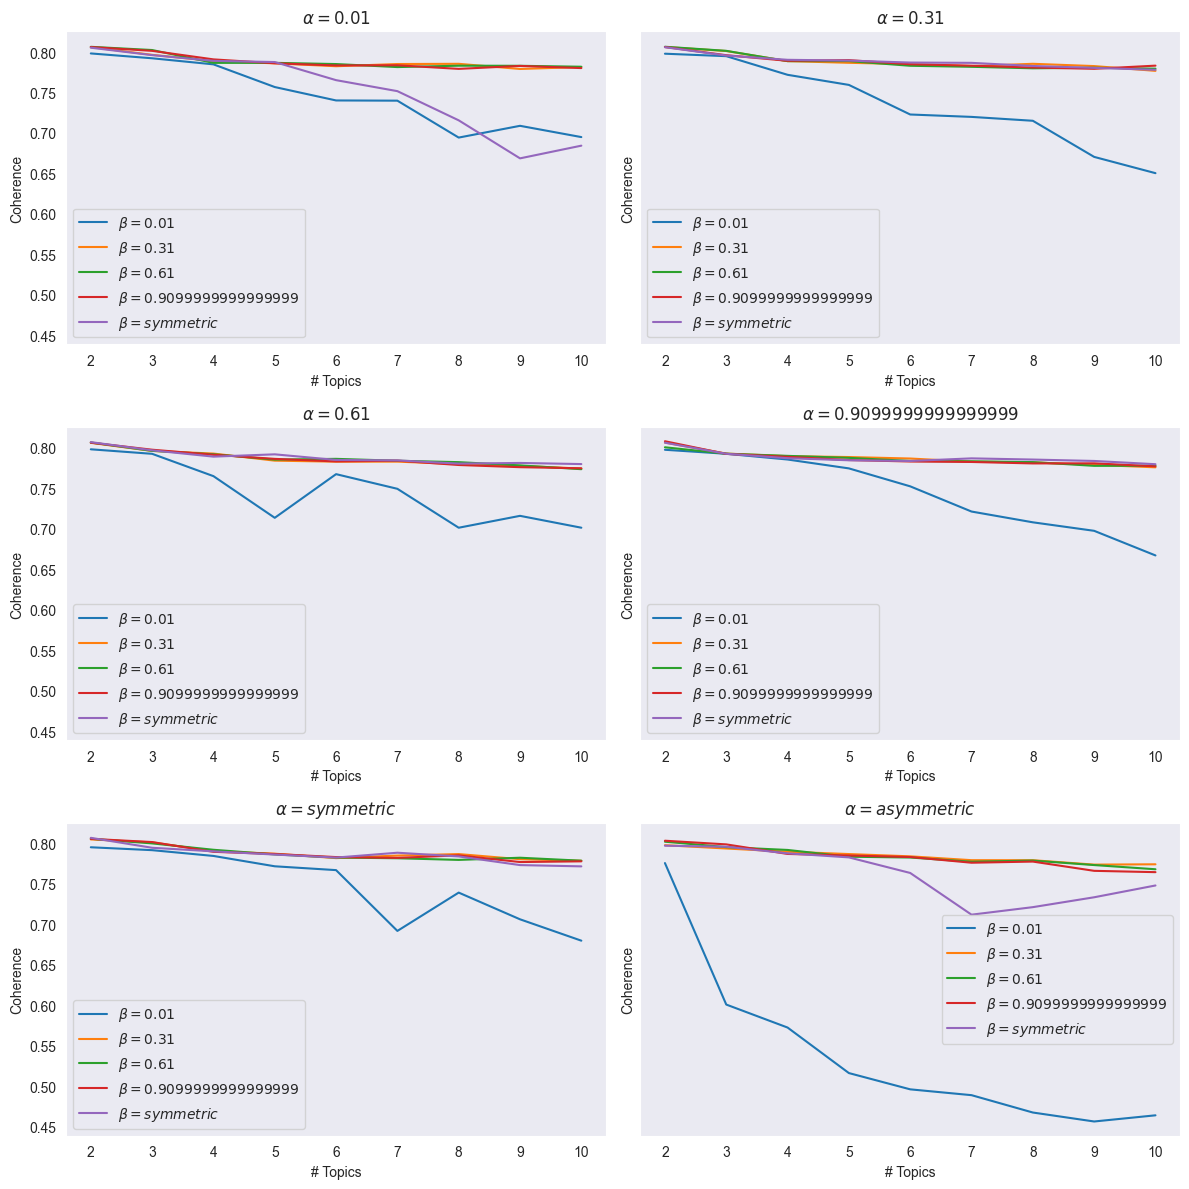

In [57]:
col_displays = 2
fig, ax = plt.subplots(nrows=len(results.keys()) // col_displays, ncols=col_displays, figsize=(12, 12), sharey=True)
c = 0
for k, vlist in results.items():
    x_position = c // col_displays
    y_position = c % col_displays
    alpha = k
    beta_list_results = defaultdict(list)
    for item in vlist:
        beta, x, y = item
        beta_list_results[beta].append((x, y))
    for beta, beta_vlist in beta_list_results.items():
        X, Y = zip(*beta_vlist)
        ax[x_position][y_position].plot(X, Y, label=rf'$\beta={beta}$')
    ax[x_position][y_position].legend()
    ax[x_position][y_position].grid()
    ax[x_position][y_position].set_title(fr'$\alpha={alpha}$')
    ax[x_position][y_position].set_xlabel('# Topics')
    ax[x_position][y_position].set_ylabel('Coherence')
    c+=1
fig.tight_layout()
plt.savefig('lda.pdf', bbox_inches='tight')